Plot vertical temperature profile from NCEP reanalysis data. xarray.open_dataset can open and decode a dataset from a file path or an OpenDAP URL.

The dataset that we will be using is here:
Catalog for long term mean data: https://psl.noaa.gov/thredds/catalog/Datasets/ncep.reanalysis.derived/pressure/catalog.html

Data server catalog for all NOAA data:
https://psl.noaa.gov/thredds/catalog/catalog.html

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import metpy.calc
from metpy.units import units

In [2]:
file1 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/air.mon.ltm.1991-2020.nc'
with xr.open_dataset(file1) as ds1:
    print(ds1)
ta=ds1.air # Unit is oC

file2 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/shum.mon.ltm.1991-2020.nc'
with xr.open_dataset(file2) as ds2:
    print(ds2)
sphum=ds2.shum  # Unit is g/kg to kg/kg

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    air                 (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    description:                     Data from NCEP initialized reanalysis (4...
    platform:                       Model
    Conventions:                    COARDS
    NCO:                            20121012
    history:                        Created 2021/07/26 by doMonthLTMNC4
    title:                          monthly mean air fr

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


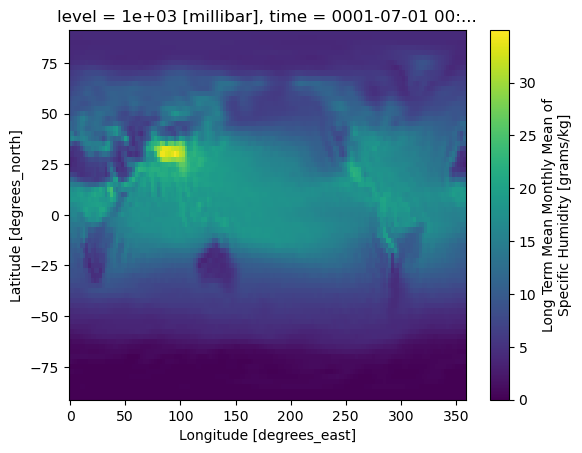

In [3]:
# Make a plot for July near surface specific humidity
sphum.isel(time=6, level=0).plot()

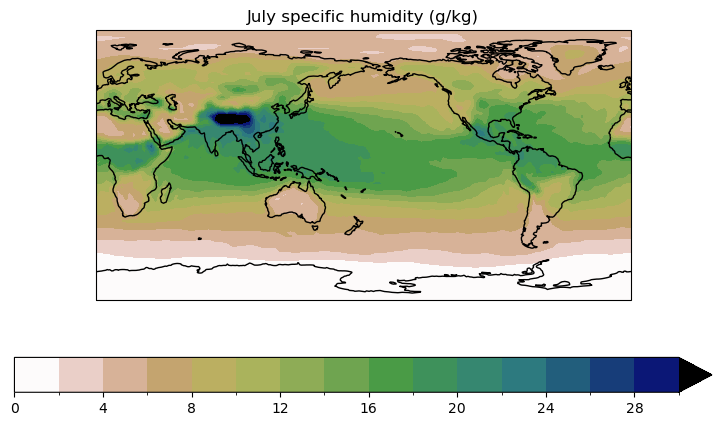

In [4]:
# Make a prettier plot
lev1=np.arange(0,32,2)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.gist_earth_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=(sphum.isel(time=6,level=0)).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('July specific humidity (g/kg)')
fig1.colorbar(cs, orientation='horizontal') # color map

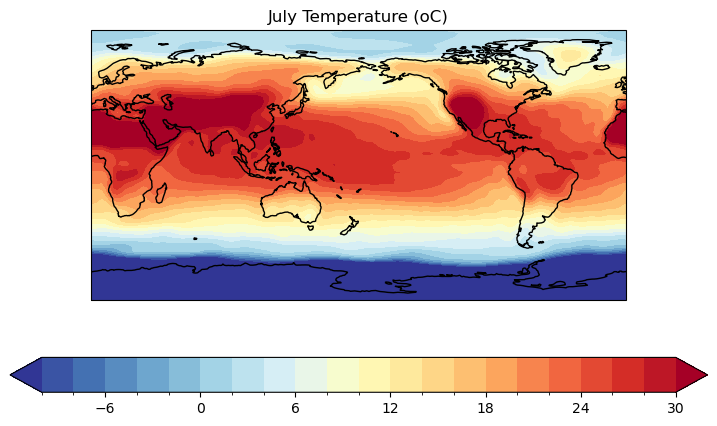

In [5]:
# Make a map for July temperature near surface
lev1=np.arange(-10,32,2)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=(ta.isel(time=6,level=0)).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('July Temperature (oC)')
fig1.colorbar(cs, orientation='horizontal') # color map

Let's calculate specific humidity.

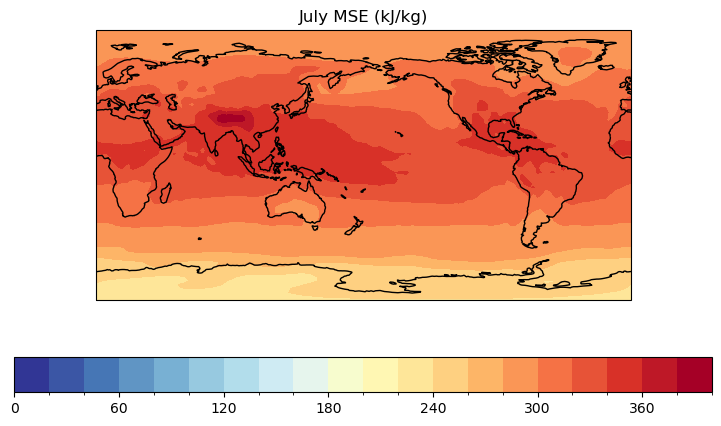

In [9]:
MSE=(1005*(ta+273.15)+2.226e6*sphum/1.e3)/1.e3  # to MJ/kg  Note that this is not accurate.
#MSE=2.226e6*sphum/1.e3/1.e3 
# Make a map for July temperature near surface
lev1=np.arange(0,420,20)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=(MSE.isel(time=6,level=0)).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('July MSE (kJ/kg)')
fig1.colorbar(cs, orientation='horizontal') # color map

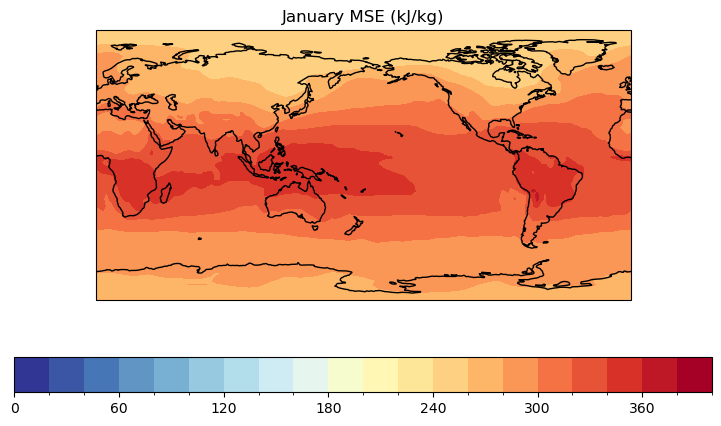

In [8]:
# Make a map for July temperature near surface
lev1=np.arange(0,420,20)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=(MSE.isel(time=0,level=0)).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('January MSE (kJ/kg)')
fig1.colorbar(cs, orientation='horizontal') # color map